In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv('../input/loan-eligible-dataset/loan-train.csv')
test=pd.read_csv('../input/loan-eligible-dataset/loan-test.csv')
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [3]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [7]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

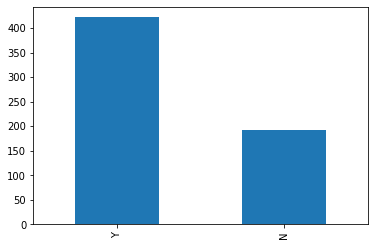

In [8]:
train["Loan_Status"].value_counts().plot(kind='bar')

Categorical features: These features have categories(Gender, Married, Self_Employed, Credit_History, Loan_Status)

<AxesSubplot:title={'center':'Gender'}>

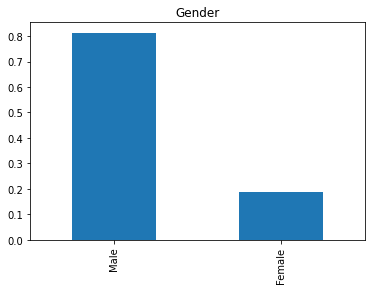

In [9]:
train["Gender"].value_counts(normalize=True).plot(kind='bar', title='Gender')


<AxesSubplot:title={'center':'Married'}>

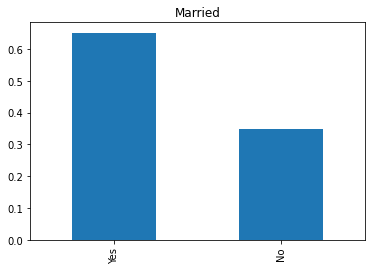

In [10]:
train["Married"].value_counts(normalize=True).plot(kind='bar', title='Married')

<AxesSubplot:title={'center':'Self_Employed'}>

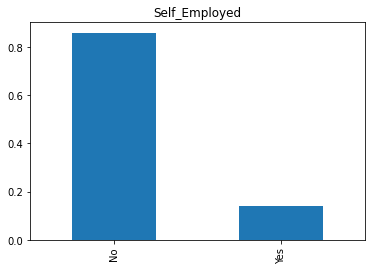

In [11]:
train["Self_Employed"].value_counts(normalize=True).plot(kind='bar', title='Self_Employed')

<AxesSubplot:title={'center':'Credit_History'}>

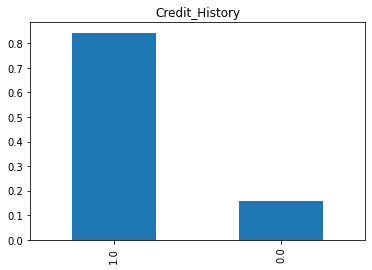

In [12]:
train["Credit_History"].value_counts(normalize=True).plot(kind='bar', title='Credit_History')

Oridinal Features: Variables in categorical features have some order involved (Dependents, Education, Property_Area)

<AxesSubplot:title={'center':'Dependents'}>

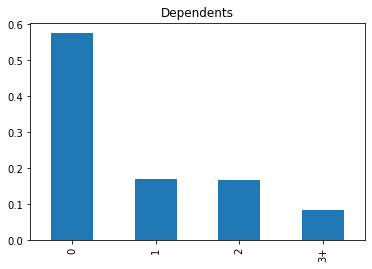

In [13]:
train["Dependents"].value_counts(normalize=True).plot(kind='bar', title='Dependents')

<AxesSubplot:title={'center':'Education'}>

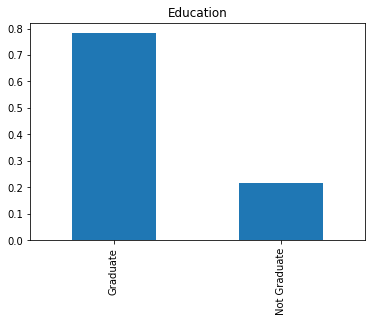

In [14]:
train["Education"].value_counts(normalize=True).plot(kind='bar', title='Education')

<AxesSubplot:title={'center':'Property_Area'}>

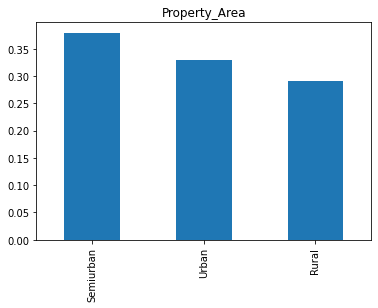

In [15]:
train["Property_Area"].value_counts(normalize=True).plot(kind='bar', title='Property_Area')

Following Inference can be made from the above three bar plots:
1. Most of the applicant's don't have any dependents
2. Arround 80% of the applicant are Graduate
3. Most of the Applicant are from the Semiurban area

Numerical Features: These Features have numerical values(Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

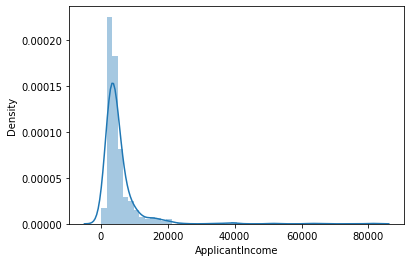

In [16]:
sns.distplot(train["ApplicantIncome"])

Distribution of the ApplicantIncome is Right Skewed That is this nor normally Distributed. We will try to make it Normal as algorithm works better.

<AxesSubplot:>

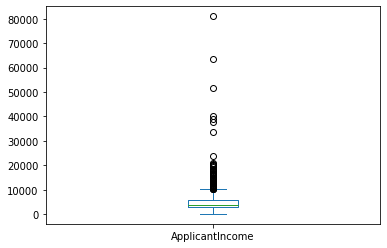

In [17]:
train["ApplicantIncome"].plot.box()

Boxplot confirms the presence of lot of outliers

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

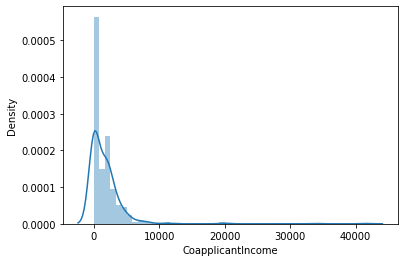

In [18]:
sns.distplot(train["CoapplicantIncome"])

<AxesSubplot:>

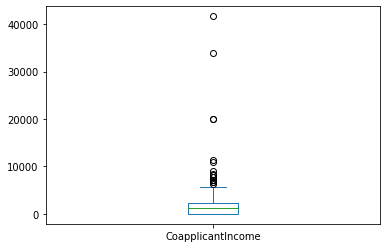

In [19]:
train["CoapplicantIncome"].plot.box()

We also see lot of outliers present in the CoapplicantIncome

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

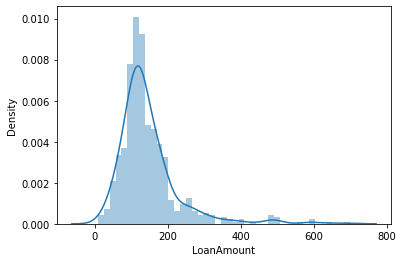

In [20]:
sns.distplot(train["LoanAmount"])

<AxesSubplot:>

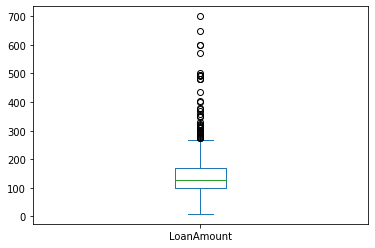

In [21]:
train["LoanAmount"].plot.box()

Also there is lot of outliers

In [22]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Bivariate Analysis

Bivariate analysis with dependent variable

<AxesSubplot:xlabel='Gender'>

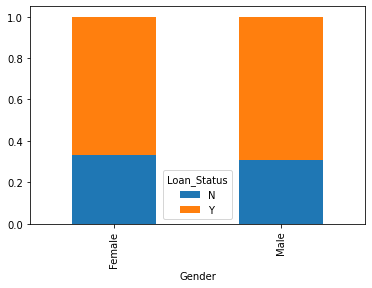

In [23]:
Gender=pd.crosstab(train["Gender"], train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans

<AxesSubplot:xlabel='Married'>

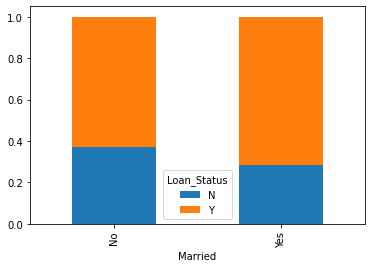

In [24]:
Married=pd.crosstab(train["Married"], train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Dependents'>

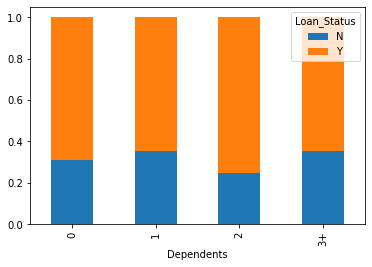

In [25]:
Dependents=pd.crosstab(train["Dependents"], train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)

<AxesSubplot:xlabel='Education'>

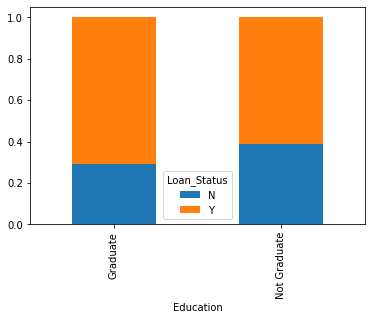

In [26]:
Education=pd.crosstab(train["Education"], train["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Self_Employed'>

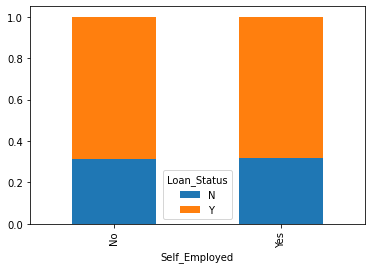

In [27]:
Self_Employed=pd.crosstab(train["Self_Employed"], train["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

<AxesSubplot:xlabel='Credit_History'>

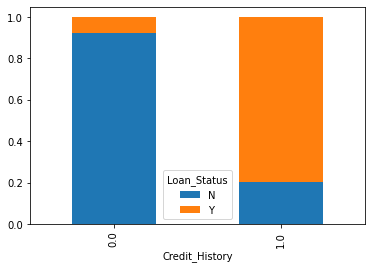

In [28]:
Credit_History=pd.crosstab(train["Credit_History"], train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

Credit_History with 1 more chance to get loan approval

<AxesSubplot:xlabel='Property_Area'>

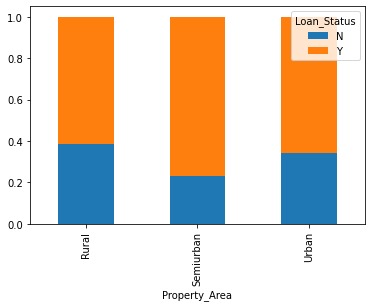

In [29]:
Property_Area=pd.crosstab(train["Property_Area"], train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [30]:
train["Dependents"].replace('3+', 3, inplace=True)
test["Dependents"].replace('3+', 3, inplace=True)

In [31]:
train["Loan_Status"].replace(['Y', 'N'], [1, 0], inplace=True)

#Most of the correlated variables are ( ApplicantIncome-LoanAmount), (Credit_History-Loan_Status) and LoanAmont is also correlated with CoapplicantIncome

In [32]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


Imputation Missing values and Outliers treatment

In [33]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History.
For Numericals Values: Imputation by Mean/ Median
For Categorical Values: Imputation by Mode


In [34]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)


In [35]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that loan amount term variable, the value 360 repeating most. So we will replace the missing value in this variables by mode function

In [36]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

Now we will see in the LoanAmount variable. As it is numerical variable, we can use mean/median to impute missing values. But if we have seen that LoanAmount is effect by outliers. So we will impute missing values by median

In [37]:
train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace=True)

In [38]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Impute missing values in the test dataset with the same approach

In [39]:
test["Gender"].fillna(test["Gender"].mode()[0], inplace=True)
test["Married"].fillna(test["Married"].mode()[0], inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0], inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0], inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0], inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0], inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace=True)

In [40]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


<AxesSubplot:>

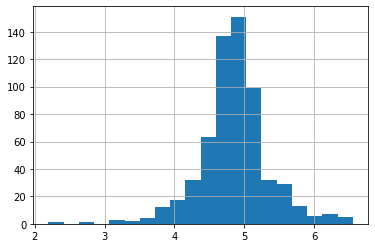

In [41]:
train["LoanAmount"]=np.log(train["LoanAmount"])
train["LoanAmount"].hist(bins=20)

<AxesSubplot:>

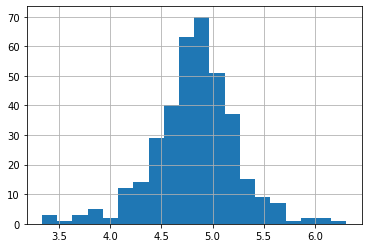

In [42]:
test["LoanAmount"]=np.log(test["LoanAmount"])
test["LoanAmount"].hist(bins=20)

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,1


In [44]:
train.shape

(614, 13)

In [45]:
train=train.drop("Loan_ID", axis=1)
test=test.drop("Loan_ID", axis=1)

In [46]:
X=train.drop("Loan_Status", axis=1)
Y=train["Loan_Status"]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban


In [47]:
X["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [48]:
X["Property_Area"].replace(['Urban', 'Semiurban', 'Rural'], [2, 1, 0], inplace=True)
X["Gender"].replace(['Male', 'Female'], [1, 0], inplace=True)
X["Married"].replace(['Yes', 'No'], [1, 0], inplace=True)
X["Education"].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
X["Self_Employed"].replace(['Yes', 'No'], [1, 0], inplace=True)
X.shape

(614, 11)

In [49]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,4.852030,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,4.189655,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,4.948760,360.0,1.0,2


In [50]:
test["Property_Area"].replace(['Urban', 'Semiurban', 'Rural'], [2, 1, 0], inplace=True)
test["Gender"].replace(['Male', 'Female'], [1, 0], inplace=True)
test["Married"].replace(['Yes', 'No'], [1, 0], inplace=True)
test["Education"].replace(['Graduate', 'Not Graduate'], [1, 0], inplace=True)
test["Self_Employed"].replace(['Yes', 'No'], [1, 0], inplace=True)

In [51]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,4.700480,360.0,1.0,2
1,1,1,1,1,0,3076,1500,4.836282,360.0,1.0,2
2,1,1,2,1,0,5000,1800,5.337538,360.0,1.0,2
3,1,1,2,1,0,2340,2546,4.605170,360.0,1.0,2
4,1,0,0,0,0,3276,0,4.356709,360.0,1.0,2


In [52]:
print(X.shape)
print(Y.shape)

(614, 11)
(614,)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, Y_train)
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, y_train_pred)
print(train_accuracy)

0.824847250509165


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
print(test_accuracy)

0.7642276422764228


In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,y_train_pred)

array([[ 68,  80],
       [  6, 337]])

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_test_pred)

array([[16, 28],
       [ 1, 78]])

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
X_resample, Y_resample=smote.fit_resample(X, Y)
Y_resample.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [59]:
print(X_resample.shape)

(844, 11)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resample, Y_resample, test_size=0.2)

In [61]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, Y_train)
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, y_train_pred)
print(train_accuracy)

0.7703703703703704


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,y_train_pred)

array([[240,  95],
       [ 60, 280]])

In [63]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
print(test_accuracy)

0.7337278106508875


In [64]:
X["TotalIncome"]=X["ApplicantIncome"]+X["CoapplicantIncome"]
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,1,0,5849,0.0,4.852030,360.0,1.0,2,5849.0
1,1,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,6091.0
2,1,1,0,1,1,3000,0.0,4.189655,360.0,1.0,2,3000.0
3,1,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,2,4941.0
4,1,0,0,1,0,6000,0.0,4.948760,360.0,1.0,2,6000.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

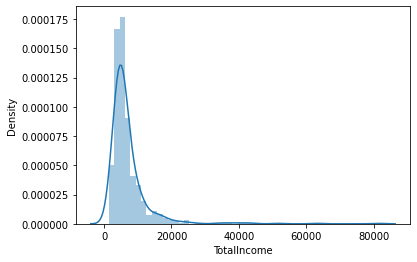

In [65]:
sns.distplot(X["TotalIncome"])

The distribution is Right Skewed. So let's take the log transformation to make the normal distribution

In [66]:
X["ToatalIncome_log"]=np.log(X["TotalIncome"])
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,ToatalIncome_log
0,1,0,0,1,0,5849,0.0,4.852030,360.0,1.0,2,5849.0,8.674026
1,1,1,1,1,0,4583,1508.0,4.852030,360.0,1.0,0,6091.0,8.714568
2,1,1,0,1,1,3000,0.0,4.189655,360.0,1.0,2,3000.0,8.006368
3,1,1,0,0,0,2583,2358.0,4.787492,360.0,1.0,2,4941.0,8.505323
4,1,0,0,1,0,6000,0.0,4.948760,360.0,1.0,2,6000.0,8.699515


In [67]:
X=X.drop(['TotalIncome','ApplicantIncome','CoapplicantIncome'], axis=1)

In [68]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,ToatalIncome_log
0,1,0,0,1,0,4.852030,360.0,1.0,2,8.674026
1,1,1,1,1,0,4.852030,360.0,1.0,0,8.714568
2,1,1,0,1,1,4.189655,360.0,1.0,2,8.006368
3,1,1,0,0,0,4.787492,360.0,1.0,2,8.505323
4,1,0,0,1,0,4.948760,360.0,1.0,2,8.699515


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model=LogisticRegression()
model.fit(X_train, Y_train)
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, y_train_pred)
print(train_accuracy)

0.8065173116089613


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [70]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
print(test_accuracy)

0.8211382113821138


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_test_pred)

array([[21, 19],
       [ 3, 80]])

In [72]:
from sklearn.tree import DecisionTreeClassifier 
model=DecisionTreeClassifier(max_depth=10)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [73]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train,y_train_pred)
print(train_accuracy)

0.8940936863543788


In [74]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test,y_test_pred)
print(test_accuracy)

0.6910569105691057


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_test_pred)

array([[21, 19],
       [19, 64]])

In [76]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=40)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=40)

In [77]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train,y_train_pred)
print(train_accuracy)

1.0


In [78]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test,y_test_pred)
print(test_accuracy)

0.7642276422764228


In [85]:
confusion_matrix(Y_test,y_test_pred)

array([[23, 17],
       [ 9, 74]])

In [79]:
#XGBoosting
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_train,Y_train)


GradientBoostingClassifier()

In [80]:
y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train, y_train_pred)
train_accuracy

0.8920570264765784

In [86]:
confusion_matrix(Y_train,y_train_pred)

array([[ 99,  53],
       [  0, 339]])

In [81]:
y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test, y_test_pred)
test_accuracy

0.7886178861788617

In [83]:
confusion_matrix(Y_test,y_test_pred)

array([[23, 17],
       [ 9, 74]])